# Baseline

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [17]:
root = "../models/baseline/"
train = root + "training.out"
test = root + "test.out"

df_train = pd.read_csv(train, header=None, sep="\t")
df_test = pd.read_csv(test, header=None, sep="\t")

In [53]:
df_test["Top 1"] = df_test[3].apply(lambda x: x.strip().split()[1]).astype(float)
df_test["Top 5"] = df_test[4].apply(lambda x: x.strip().split()[1]).astype(float)

df_train["Top 1"] = df_train[4].apply(lambda x: x.strip().split()[1]).astype(float)
df_train["Top 5"] = df_train[5].apply(lambda x: x.strip().split()[1]).astype(float)

In [60]:
i = 1
top5_test_acc = []
top1_test_acc = []
top5_total = 0
top1_total = 0
for index, row in df_test.iterrows():
    if ("[  0/196]" in row[0]):
        top1_test_acc.append(top1_total/i)
        top5_test_acc.append(top5_total/i)
        top1_total = 0
        top5_total = 0
        i = 0

        
    top1_total += row["Top 1"]
    top5_total += row["Top 5"]
    i += 1

        
top1_test_acc = top1_test_acc[1:]
top5_test_acc = top5_test_acc[1:]

In [62]:
i = 1
top5_train_acc = []
top1_train_acc = []
top5_total = 0
top1_total = 0
for index, row in df_train.iterrows():
    if ("[   0/5005]" in row[0]):
        top1_train_acc.append(top1_total/i)
        top5_train_acc.append(top5_total/i)
        top1_total = 0
        top5_total = 0
        i = 0

        
    top1_total += row["Top 1"]
    top5_total += row["Top 5"]
    i += 1

        
top1_train_acc = top1_train_acc[1:]
top5_train_acc = top5_train_acc[1:]

Text(0, 0.5, 'Accuracy (%)')

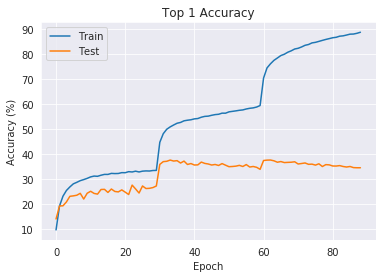

In [73]:
plt.plot(top1_train_acc, label="Train")
plt.plot(top1_test_acc, label="Test")
plt.legend()
plt.title("Top 1 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

Text(0, 0.5, 'Accuracy (%)')

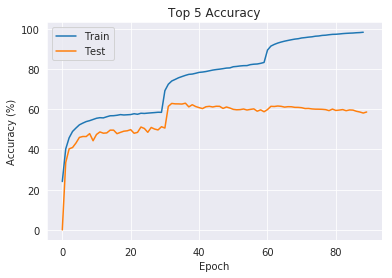

In [74]:
plt.plot(top5_train_acc, label="Train")
plt.plot(top5_test_acc, label="Test")
plt.legend()
plt.title("Top 5 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")